In [3]:
import importlib

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
from shapely.geometry import Polygon

import bento as bt

mpl.style.use("dark_background")

import logging

logging.getLogger('matplotlib.font_manager').disabled = True

In [4]:
adata = bt.ds.load_dataset("merfish")


In [5]:
adata

AnnData object with n_obs × n_vars = 1153 × 135
    obs: 'cell_shape', 'nucleus_shape', 'batch'
    uns: 'points'
    layers: 'spliced', 'unspliced'

In [6]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
bt.tl.obs_stats(adata)


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

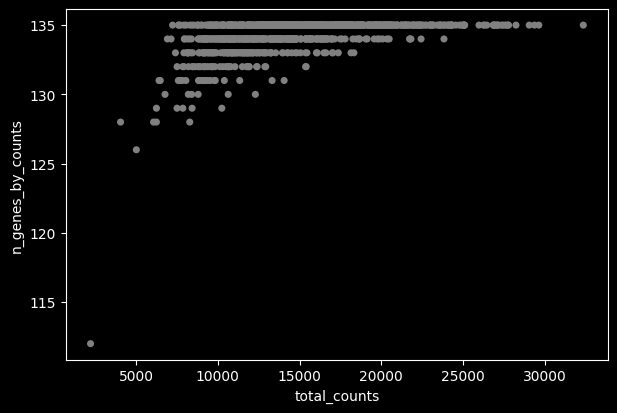

In [7]:
sc.pl.scatter(adata, x="total_counts", y="n_genes_by_counts")


Saved to u2os_obs_stats.svg


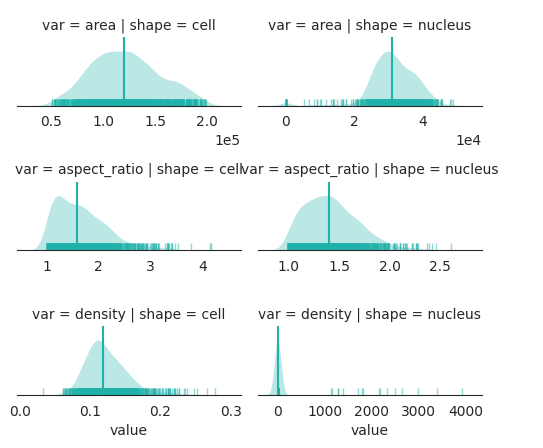

In [8]:
importlib.reload(bt.pl._multidimensional)
importlib.reload(bt.pl._plotting)
importlib.reload(bt.pl)

with sns.axes_style("white"):
    bt.pl.obs_stats(adata, rug=True, fname="u2os_obs_stats.svg")


In [9]:
importlib.reload(bt)
importlib.reload(bt.tl)
importlib.reload(bt.tl._flux)

r = 40
dx = 0.1
res = 0.1
bt.settings.log.setLevel("WARNING")

bt.tl.flux(adata, radius=r, train_size=1, use_highly_variable=False, res=res)


  0%|          | 0/1153 [00:00<?, ?it/s]

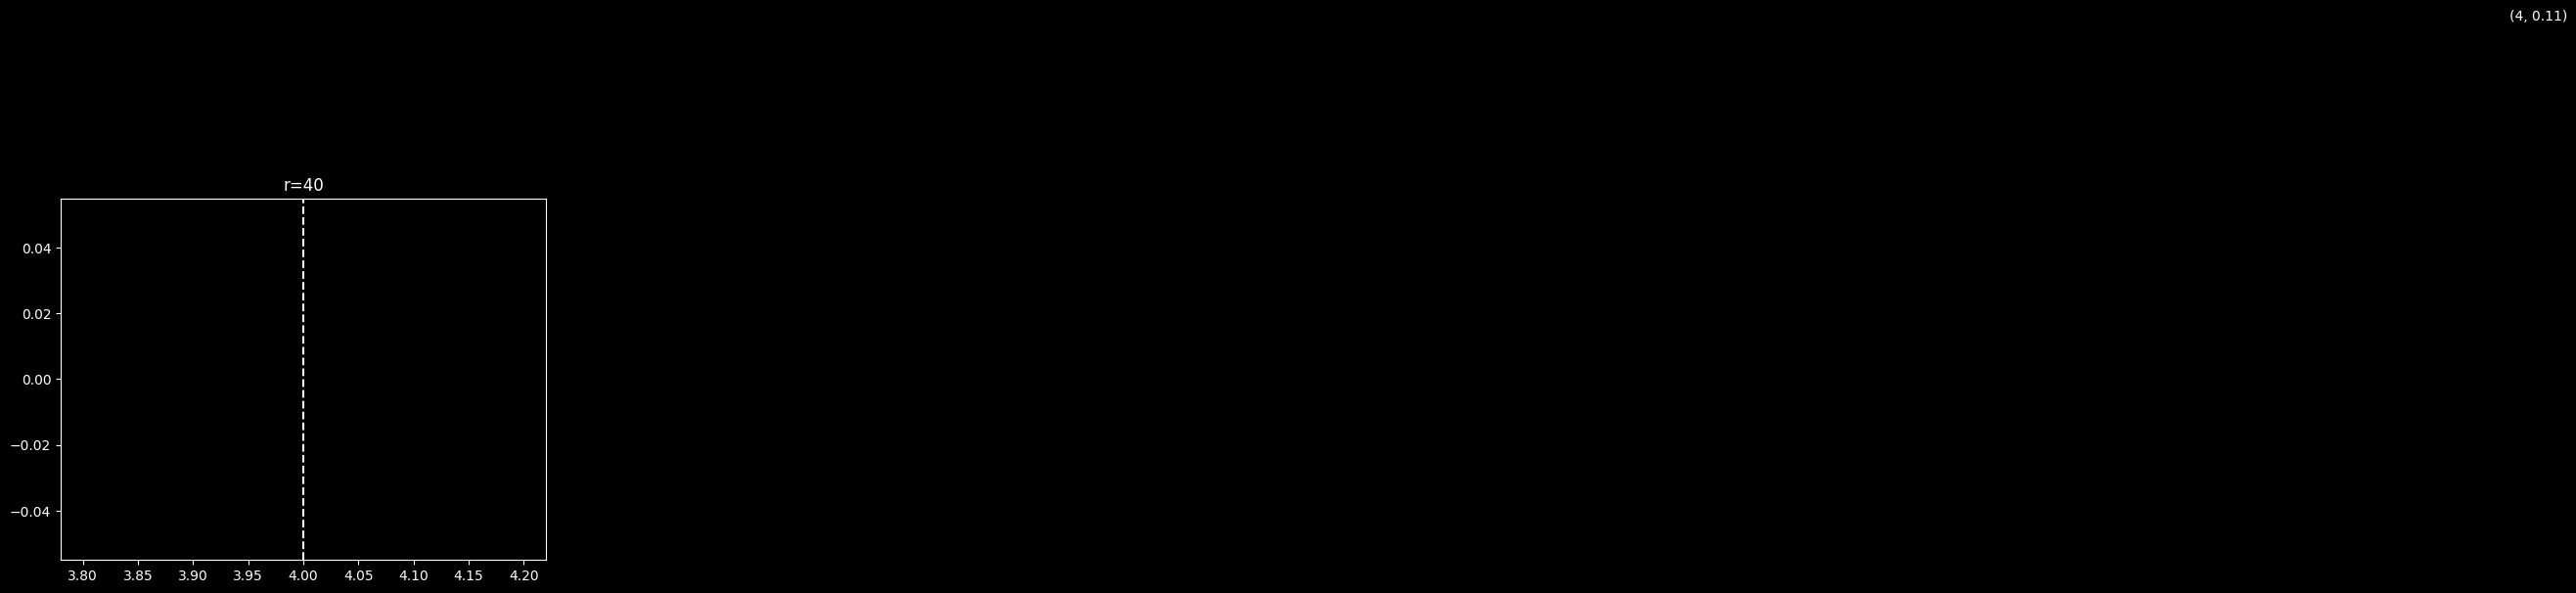

In [10]:
ax = sns.lineplot(np.cumsum(adata.uns["flux_variance_ratio"]))
elbow = adata.uns["flux_n_components"]
cumvar = np.sum(adata.uns["flux_variance_ratio"][: elbow + 1])
ax.axvline(elbow, ls="--")
ax.text(elbow + 2, cumvar, f"({elbow}, {cumvar:.2f})")
ax.set_title(f"r={r}")

plt.tight_layout()


In [11]:
bt.tl.fluxmap(adata, n_clusters=5, res=res, train_size=0.2)


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1153 [00:00<?, ?it/s]

  0%|          | 0/1153 [00:00<?, ?it/s]

In [12]:
adata_small = adata[adata.obs["batch"] == "8"]
adata_small.uns["points"] = adata_small.uns["points"].query("batch == 8")
adata_small.uns["points"]["batch"] = adata_small.uns["points"]["batch"].astype(str)
bt.sync(adata_small)


Saved to u2os_flux.svg


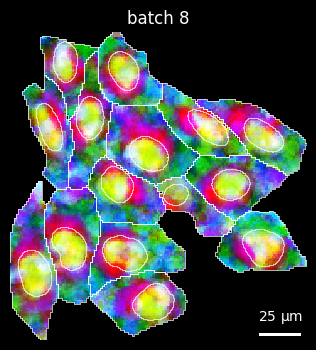

In [13]:
importlib.reload(bt.pl._utils)
importlib.reload(bt.pl._layers)
importlib.reload(bt.pl._plotting)
importlib.reload(bt.pl)

mpl.style.use("dark_background")
plt.figure(figsize=(4, 4))
bt.pl.flux(
    adata_small,
    res=res,
    alpha=False,
    dx=dx,
    title=None,
    frame_visible=False,
    fname="u2os_flux.svg",
)
# plt.title(f"radius={r:.2f}")


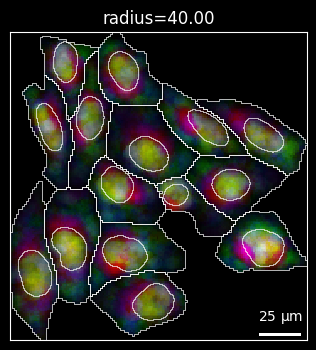

In [14]:
importlib.reload(bt.pl._utils)
importlib.reload(bt.pl._plotting)
importlib.reload(bt.pl)

mpl.style.use("dark_background")
plt.figure(figsize=(4, 4))

bt.pl.flux(adata_small, res=res, alpha=True, dx=dx, title=f"radius={r:.2f}")


Saved to u2os_points.svg


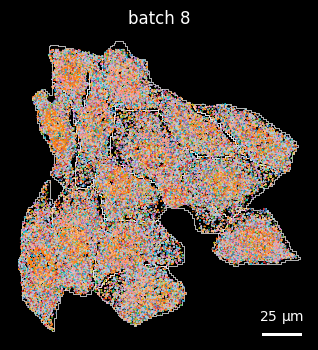

In [15]:
importlib.reload(bt.pl._utils)
importlib.reload(bt.pl._layers)
importlib.reload(bt.pl._plotting)
importlib.reload(bt.pl)

plt.figure(figsize=(4,4))
bt.pl.points(adata_small, dx=dx, s=1, hue="gene", legend=False, palette="tab20", frame_visible=False, title="", fname="u2os_points.svg")


<Axes: >

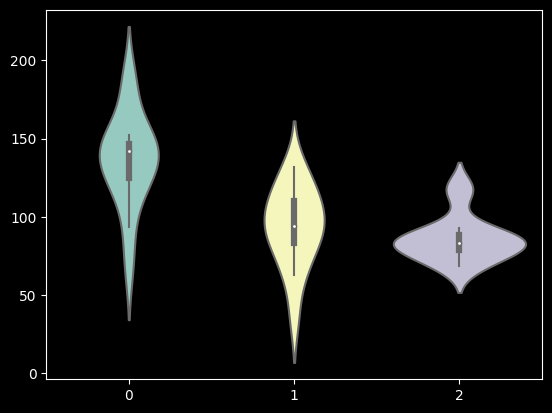

In [16]:
cell_flux = pd.DataFrame(adata_small.uns["flux_embed"][:, :3]).groupby(
    adata_small.uns["cell_raster"]["cell"].values
)
intra_var = cell_flux.var()
inter_var = cell_flux.mean().var()

sns.violinplot(
    data=intra_var / inter_var,
)


In [17]:
sns.color_palette(
    [
        "#FFD166",
        "#06D6A0",
        "#118ab2",
        "#396270",
        "#f78c6b",
        "#ef476f",
    ]
)


[(1.0, 0.8196078431372549, 0.4),
 (0.023529411764705882, 0.8392156862745098, 0.6274509803921569),
 (0.06666666666666667, 0.5411764705882353, 0.6980392156862745),
 (0.2235294117647059, 0.3843137254901961, 0.4392156862745098),
 (0.9686274509803922, 0.5490196078431373, 0.4196078431372549),
 (0.9372549019607843, 0.2784313725490196, 0.43529411764705883)]

Saved to u2os_fluxmap.svg


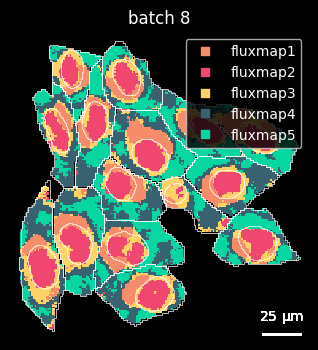

In [18]:
importlib.reload(bt.pl._utils)
importlib.reload(bt.pl._plotting)
importlib.reload(bt.pl)

fig = plt.figure(figsize=(4, 4))
bt.pl.fluxmap(
    adata_small,
    dx=dx,
    palette=[bt.colors.bento6[i] for i in [4, 5, 0, 3, 1]],
    linewidth=0,
    frame_visible=False,
    legend=True,
    fname="u2os_fluxmap.svg",
)
# plt.legend()


In [19]:
adata_small.uns["comp_stats"] = bt.tl._composition._get_compositions(
    adata_small.uns["points"],
    shape_names=[
        "fluxmap1_shape",
        "fluxmap2_shape",
        "fluxmap3_shape",
        "fluxmap4_shape",
        "fluxmap5_shape",
    ],
)


[19:34:21] WARNING  No artists with labels found to put in legend.  Note that artists whose label    ]8;id=861304;file://C:\Users\Aastha_Ishan\anaconda3\envs\bento\lib\site-packages\matplotlib\legend.py\legend.py]8;;\:]8;id=488527;file://C:\Users\Aastha_Ishan\anaconda3\envs\bento\lib\site-packages\matplotlib\legend.py#1323\1323]8;;\
                    start with an underscore are ignored when legend() is called with no argument.                 

Adjusting text positions...
Saved to u2os_flux_summary.svg


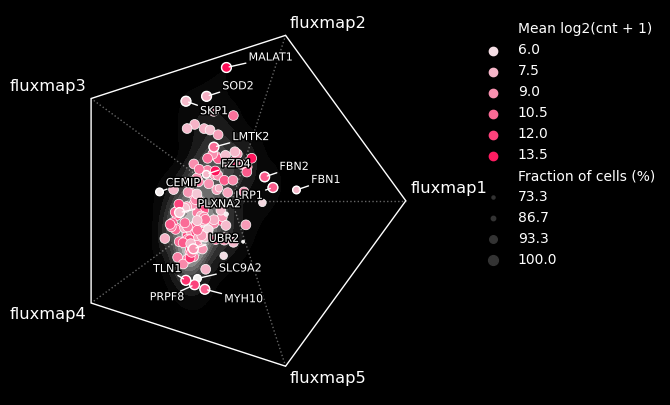

In [20]:
importlib.reload(bt.pl._multidimensional)
importlib.reload(bt.pl._plotting)
importlib.reload(bt.pl)


from IPython.display import display

top_genes = []
for i in range(1, 6):
    top_g = (
        adata_small.uns["comp_stats"]
        .sort_values(f"fluxmap{i}", ascending=False)
        .head(3)
        .index.tolist()
    )
    top_genes.extend(top_g)

bt.pl.flux_summary(
    adata_small,
    annotate=top_genes,
    annot_color="white",
    size_norm=(85, 100),
    sizes=(5, 50),
    fname="u2os_flux_summary.svg",
)


In [21]:
adata_small.uns["point_sets"]["points"] = []


In [22]:
importlib.reload(bt.pl._layers)
importlib.reload(bt.pl._plotting)
importlib.reload(bt.pl)


<module 'bento.plotting' from 'C:\\Users\\Aastha_Ishan\\anaconda3\\envs\\bento\\lib\\site-packages\\bento\\plotting\\__init__.py'>

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not array('white', dtype='<U5')

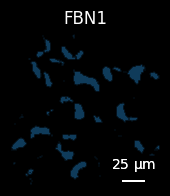

In [23]:
shape_paired = (
    ["fluxmap1_shape"] * 3
    + ["fluxmap2_shape"] * 3
    + ["fluxmap3_shape"] * 3
    + ["fluxmap4_shape"] * 3
    + ["fluxmap5_shape"] * 3
)
for g, s in zip(top_genes, shape_paired):
    fig = plt.figure(figsize=(2, 2))
    bt.pl.shapes(
        adata_small,
        shapes=[s],
        color="tab:blue",
        color_style="fill",
        alpha=0.5,
        frame_visible=False,
    )

    bt.pl.points(
        adata_small[:, g],
        shapes=["cell_shape"],
        s=8,
        c="white",
        title=g,
        frame_visible=False,
    )
    # break


In [ ]:
adata_small.obs = adata_small.obs.to_numpy()
adata_small.var = adata_small.var.to_numpy()


In [ ]:
# # adata_small.X = adata_small.X.toarray()  # Convert sparse matrix to dense
# bt.tl.fe_fazal2019(adata_small)


In [ ]:
print(type(adata_small.X))        # Should be `numpy.ndarray`
print(type(adata_small.obs))      # Check if `samples` comes from `obs`
print(type(adata_small.var))      # Check if `features` comes from `var`


In [ ]:
import numpy as np

# Ensure `adata_small.X` is dense
if isinstance(adata_small.X, np.ndarray) is False:  # Only convert if not already dense
    adata_small.X = adata_small.X.toarray()


In [ ]:
genesets = [
    "flux_Cytosol",
    "flux_ER Lumen",
    "flux_ERM",
    "flux_Lamina",
    "flux_Nuclear Pore",
    "flux_Nucleolus",
    "flux_Nucleus",
    "flux_OMM",
]

# Define the subplot grid
n_genesets = len(genesets)
n_cols = 3  # Example: Set 3 columns
n_rows = (n_genesets + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten to make iteration easier

for gs, ax in zip(genesets, axes.flat):
    bt.pl.fe(
        adata_small,
        gs,
        cmap=bt.colors.red_dark,
        vmin=0,
        vmax=5,
        frame_visible=False,
        dx=dx,
        title=gs,
        ax=ax,
    )


In [ ]:
adata_small.uns["cell_raster"]["fluxmap"].unique()


In [ ]:
@bt.pl._utils.savefig
def plot_domain_fe(data, fname=None):
    domains = [
        "flux_Cytosol",
        "flux_ER Lumen",
        "flux_ERM",
        "flux_Lamina",
        "flux_Nuclear Pore",
        "flux_Nucleolus",
        "flux_Nucleus",
        "flux_OMM",
    ]

    domain_fe = pd.DataFrame(
        np.stack([data.uns[d] for d in domains], axis=1),
        index=data.uns["cell_raster"].index,
        columns=domains,
    )

    # Count fraction of samples with flux > 1
    domain_fe = domain_fe.groupby(data.uns["cell_raster"]["fluxmap"]).apply(
        lambda x: (x > 0).sum() / x.shape[0]
    )
    domain_fe.columns = [d.split("flux_")[1] for d in domain_fe.columns]
    domain_fe = domain_fe.dropna(axis=0)

    domain_fe = domain_fe.iloc[1:, :]

    with mpl.style.context("dark_background"):
        ax = sns.heatmap(
            domain_fe.T,
            vmin=0,
            vmax=1,
            lw=0.5,
            cmap=bt.colors.red_light,
            square=True,
            annot=True,
            fmt=".2f",
        )
        ax.spines[:].set_visible(True)


plot_domain_fe(adata_small, fname="u2os_domain_fazal2019.svg")


In [42]:
adata_small.uns["fe_stats"].max()


KeyError: 'fe_stats'

TODO: Plot specific pairs of fluxmaps and genesets.


Saved to /home/ckmah/projects/spatial/figures/u2os_fluxmap1_OMM.svg
Saved to /home/ckmah/projects/spatial/figures/u2os_fluxmap2_Nucleus.svg
Saved to /home/ckmah/projects/spatial/figures/u2os_fluxmap3_ERM.svg
Saved to /home/ckmah/projects/spatial/figures/u2os_fluxmap4_Cytosol.svg
Saved to /home/ckmah/projects/spatial/figures/u2os_fluxmap5_Cytosol.svg


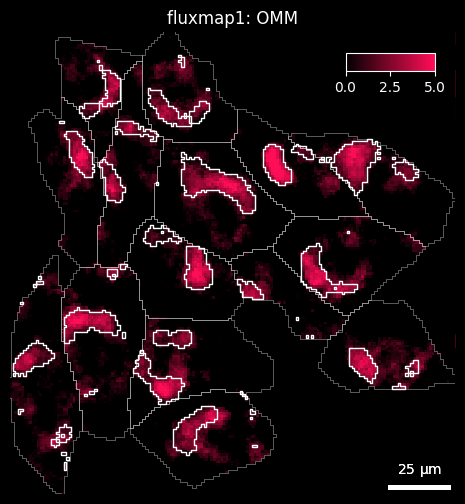

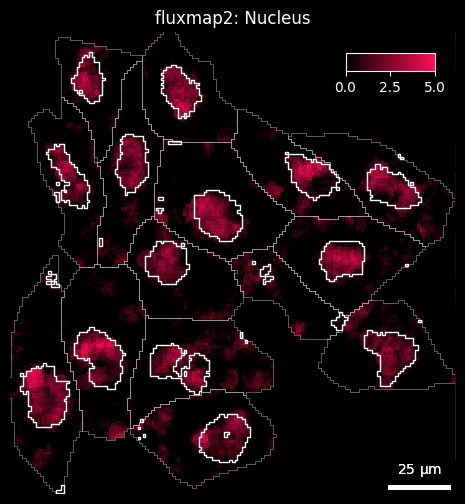

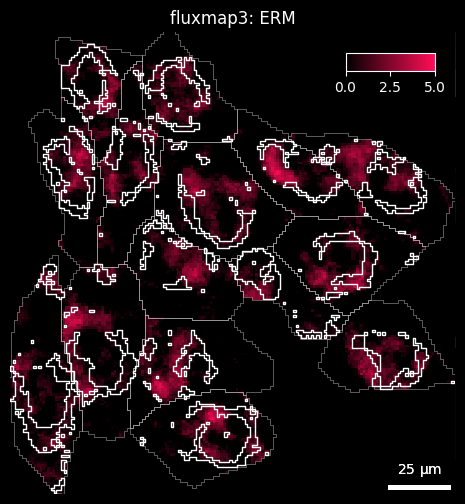

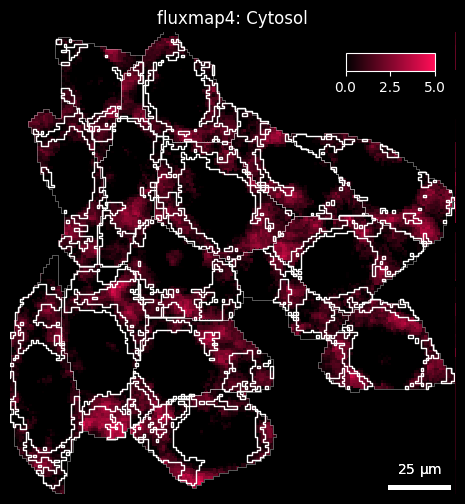

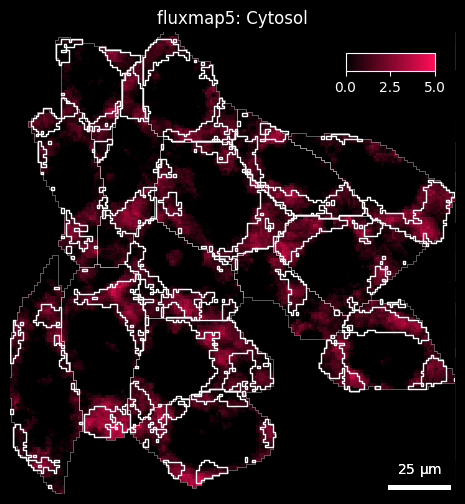

In [216]:
fluxmaps = [f"fluxmap{i}" for i in range(0, 6)]
genesets = ["", "flux_OMM", "flux_Nucleus", "flux_ERM", "flux_Cytosol", "flux_Cytosol"]


for fm, gs in zip(fluxmaps, genesets):
    if gs == "":
        continue

    gs_title = gs.replace("flux_", "")
    plt.figure(figsize=(6, 6))
    bt.pl.shapes(adata_small, shapes=["cell_shape"], alpha=0.5)
    bt.pl.fe(
        adata_small,
        gs,
        shapes=[fm],
        cmap=bt.colors.red_dark,
        vmin=0,
        vmax=5,
        dx=dx,
        title=f"{fm}: {gs_title}",
        frame_visible=False,
        shape_kws=dict(lw=1),
        fname=f"/home/ckmah/projects/spatial/figures/u2os_{fm}_{gs_title}.svg",
    )


In [19]:
pc_weights = pd.DataFrame(
    adata.uns["flux_sv"][:25],
    index=[f"PC{i}" for i in range(25)],
    columns=adata.uns["flux_genes"],
)


In [20]:
import decoupler as dc

fazal2019 = bt.tl.load_gene_sets("fazal2019")
fazal2019 = fazal2019.pivot(index="source", columns="target", values="weight").T.fillna(
    0
)
fazal2019.head()


source,Cytosol,ER Lumen,ERM,Lamina,Nuclear Pore,Nucleolus,Nucleus,OMM
target,,,,,,,,
AARS2,-0.280999,0.044633,0.357659,-0.195066,0.291704,-1.225867,0.179871,2.715643
AASDH,-0.290857,-0.470415,-0.616271,0.753356,-0.602657,1.096525,0.418622,-0.845593
AASS,0.016639,-0.131917,1.740126,0.443978,0.529793,0.864569,0.302249,4.236737
ABCA3,-0.011081,0.117976,1.117785,-0.109083,0.119327,-0.427571,-0.308186,1.289387
ABCB10,-0.950674,-0.511049,-0.726714,0.272038,-0.602548,0.247002,-0.144214,1.350953


In [21]:
common_genes = set(fazal2019.index).intersection(set(pc_weights.columns))


In [22]:
all_df = pd.concat([pc_weights[common_genes].T, fazal2019.loc[common_genes]], axis=1)
